In [1]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

**Scenario Description:**

The first order catalysed gas phase reaction where: $A \rightarrow B + C$ is allowed to take place in an *adiabatically* operated PACKED BED reactor where spherical, porous catalyst particles are used. 

A feed stream that consists out of PURE gas A is fed to the reactor. The state variables of this stream at the inlet to the reactor are given in Table 1

<img src="CRO410ST2020a.JPG" width="850" />

Parameters relevant to the chemical reaction and components are given in Table 2

<img src="CRO410ST2020b.JPG" width="850" />

Some details on the porous catalyst are given in Table 3

<img src="CRO410ST2020c.JPG" width="850" />

The reactor is packed with **$W = 110~kg$** of catalyst. In the following questions you will be required to evaluate the effect of catalyst particle size on the performance of the reactor by
considering a particle size range $0.4~mm \leq d_{p} \leq 1~mm$. 

It is known that the Ergun constant for catalyst particles with $d_{p} = 1~mm$ is: $K_{Ergun} = 0.75~\dfrac{kPa}{kg}$. Turbulent flow may be assumed.

In [2]:
# 1st order reaction
# Adiabatic
# PBR
# spherical and porous catalyst
# Pure gas A is fed into the reactor

In [3]:
Po      = 1000 #kPa
To      =  450 #K
Qo      = 0.02 #m3/s

In [4]:
koprime = 0.2936 #kg/m3.s
Etrue   =  31400 #J/mol
CpA     =     40 #J/mol.K
CpB     =     25 #J/mol.K
CpC     =     15 #J/mol.K
dHrx    = -20000 #J/mol

In [5]:
De      = 7.5e-8 #m2/s
rhocat  =   1800 #kg/m3
epsilon =    0.4

In [6]:
W     = 110 #kg
Kerg  = 0.75 #kpa/kg - when dp = 1mm
dperg = 1/1000 #m #particle diameter to range from 0.4mm to 1mm
# TURBULENT FLOW ASSUMED!

**1. Declare that the answers and code provided are your own work by answering the first true or false question**

I do hereby declare that all the python code and handwritten answers submitted are my own original work

**2. What is the conversion of reactant A in a reactor with $W = 110~kg$ of catalyst if the reactor is *free* of any internal or external mass transfer effects and catalyst particles with $d_{p} = 1~mm$ are used? Give answer as a $\%$ and round to 3 significant numbers(i.e $12.3~\%$)** [5 points]

In [7]:
#no internal or external mass transfer effects assumed.

In [8]:
#dp=1mm

In [9]:
rhobed = rhocat*(1-epsilon)
rhobed

1080.0

In [10]:
R   = 8.314 #kJ/(kmol.K)
Fto = Qo*Po/(R*To)
Fto

0.005345735439553096

In [11]:
FAo = Fto #Pure A is fed
FBo = 0
FCo = 0

In [12]:
M = -dHrx/CpA #gradient for energy balance
def Q2(var,w):
    FA, FB, FC, P   = var
    Ftot   = FA + FB + FC
    X      = (FAo - FA)/FAo
    T      = To + M*X
    kprime = koprime*exp(-Etrue/(R*T))
    Q      = Ftot*R*T/P
    rA     = -kprime*FA/Q #raprime
    rB     = -rA
    rC     = -rA
    dFAdW  = rA
    dFBdW  = rB
    dFCdW  = rC
    dPdW   = -Kerg*(Po/P)*(Ftot/FAo)*(T/To)
    return[dFAdW,dFBdW,dFCdW,dPdW] 

In [13]:
wspan = linspace(0,W,100)
init = (FAo,0,0,Po)
sols = odeint(Q2,init,wspan)

In [14]:
FA,FB,FC,P = sols.T

XA = (FAo - FA[-1])/FAo

print('conversion=', XA*100,'%')
print('W = ',W,'kg catalyst')  
print('P =',P[-1],'kPa')

conversion= 91.71620252265576 %
W =  110 kg catalyst
P = 800.7360819391638 kPa


**Q2 Answer: $91.7~\%$**

----------------------------------------------------------------

**3. What is the conversion of reactant $A$ in the same reactor if internal diffusion is considered? You may still assume that external diffusion effects are negligible. Give answer as a $\%$ and round to 3 significant numbers (i.e $12.3\%$)** [5 points]

In [15]:
def Q3(var,w):
    FA, FB, FC, P   = var
    Ftot   = FA + FB + FC
    X      = (FAo - FA)/FAo
    T      = To + M*X
    kprime = koprime*exp(-Etrue/(R*T))
    Rp     = dperg/2
    phi    = (kprime*rhocat*(Rp**2)/De)**0.5
    eta    = (3/(phi**2))*((phi/tanh(phi))-1)
    Q      = Ftot*R*T/P
    rA     = -eta*kprime*FA/Q #raprime
    rB     = -rA
    rC     = -rA
    dFAdW  = rA
    dFBdW  = rB
    dFCdW  = rC
    dPdW   = -Kerg*(Po/P)*(Ftot/FAo)*(T/To)
    return[dFAdW,dFBdW,dFCdW,dPdW] 

In [16]:
W3 = 110 #kg
wspan3 = linspace(0,W3,100)
init3 = (FAo,0,0,Po)
sols3 = odeint(Q3,init3,wspan3)

In [17]:
FA3,FB3,FC3,P3 = sols3.T

XA3 = (FAo - FA3[-1])/FAo

print('conversion=', XA3*100,'%')
print('W = ',W3,'kg catalyst')  
print('P =',P3[-1],'kPa')

conversion= 75.4174992546479 %
W =  110 kg catalyst
P = 826.3286151499691 kPa


**Q3 Answer: $75.4~\%$**

--------------------------------------------------------------

**4. The catalyst particle diameter is now reduced to $d_{p} = 0.5~mm$. What is the conversion of A in the reactor with the new catalyst size? You may still assume external diffusion effects to be negligible and $W = 110~kg$. Give answer as a $\%$ and round to $3$ significant numbers (i.e $12.3\%$)** [5 points]

For Turbulent flow assumed as given in the description:
\begin{equation}
			\frac{dP}{dz} = -\dfrac{1.75G^{2}}{\rho_{\circ}d_{p}}\left(\frac{1 - \epsilon}{\epsilon}\right)\left(\dfrac{P_{\circ}}{P}\frac{F_{T}}{F_{T_{\circ}}}\frac{T}{T_{\circ}}\right)
\end{equation}

But $K_{Ergun}$ units are in $\dfrac{Pressure}{m}$, therefore:
$$
\begin{equation}
		\frac{dP}{dW} = -\dfrac{1.75}{\rho_{\circ}d_{p}}\left(\frac{1 - \epsilon}{\epsilon}\right)\dfrac{G^{2}}{\rho_{B}A_{across}}\left(\dfrac{P_{\circ}}{P}\frac{F_{T}}{F_{T_{\circ}}}\frac{T}{T_{\circ}}\right)
\end{equation}
$$	
Where:
$$
\begin{equation}
		K_{Ergun} = -\dfrac{1.75}{\rho_{\circ}d_{p}}\left(\frac{1 - \epsilon}{\epsilon}\right)\dfrac{G^{2}}{\rho_{B}A_{across}}
\end{equation}
$$

so: 
$$
\begin{align}
 K_{Ergun}'  &\propto \dfrac{1}{d_{p}} \nonumber
\end{align}
$$

Where $d_{p1} = 1~mm$:
\begin{align}
 K_{Ergun_{NEW}}^{'} &= -\dfrac{1.75}{\rho_{\circ}d_{p2}}\left(\frac{1 - \epsilon}{\epsilon}\right)\dfrac{G^{2}}{\rho_{B}A_{across}} \nonumber \\
  K_{Ergun_{NEW}}^{'} &= -\dfrac{1.75}{\rho_{\circ}(0.5d_{p1})}\left(\frac{1 - \epsilon}{\epsilon}\right)\dfrac{G^{2}}{\rho_{B}A_{across}} \nonumber \\
   K_{Ergun_{NEW}}^{'} &= 2 \times K_{Ergun}^{'}  \nonumber 
\end{align}

In [18]:
KergNEW = 2*Kerg
KergNEW

1.5

In [19]:
dp2 = 0.5/1000 #m - new particle diameter

In [20]:
def Q4(var,w):
    FA, FB, FC, P   = var
    Ftot   = FA + FB + FC
    X      = (FAo - FA)/FAo
    T      = To + M*X
    kprime = koprime*exp(-Etrue/(R*T))
    Rp     = dp2/2
    phi    = (kprime*rhocat*(Rp**2)/De)**0.5
    eta    = (3/(phi**2))*((phi/tanh(phi))-1)
    Q      = Ftot*R*T/P
    rA     = -eta*kprime*FA/Q #raprime
    rB     = -rA
    rC     = -rA
    dFAdW  = rA
    dFBdW  = rB
    dFCdW  = rC
    dPdW   = -KergNEW*(Po/P)*(Ftot/FAo)*(T/To)
    return[dFAdW,dFBdW,dFCdW,dPdW] 

In [21]:
W4 = 110 #kg
wspan4 = linspace(0,W4,100)
init4 = (FAo,0,0,Po)
sols4 = odeint(Q4,init4,wspan4)

In [22]:
FA4,FB4,FC4,P4 = sols4.T

XA4 = (FAo - FA4[-1])/FAo

print('conversion=', XA4*100,'%')
print('W = ',W4,'kg catalyst')  
print('P =',P4[-1],'kPa')

conversion= 80.38065705417198 %
W =  110 kg catalyst
P = 582.035955120558 kPa


**Q4 Answer: $80.4~\%$**

--------------------------------------------------------------

**5. In the particle range given in the problem scenario description above (i.e $0.4~mm \leq d_{p} \leq 1~mm$, what is the optimum particle diameter that should be used in the reactor in order to maximise conversion of reactant $A$? (External diffusion effects negligible) Give answer in units of mm and round to 3 significant numbers, i.e. $0.123~mm$** [8 points]

Required: I need a conversion profile for each diameter in the given range. 

Approach: 
1) I'll need a main function that will input discrete steps of particle diameters from $0.4~mm$ to $1~mm$. For each discrete step, another function needs to be called that will take the new particle diameter, calculate the new $K_{Ergun}$ value and return the related conversion.

2) Produce a diagram of the conversion profile within the particle diameter range

3) See where the maximum lies and use the argmax command with the particle size range as an index to return the maximum conversion with it's corresponding particle diameter.

In [23]:
dpspan = linspace(0.4e-3,1.0e-3,60)
#Conversion = dprange(dpspan)
Conversion = []
for vals in dpspan:
    dp = vals
    
    def Q5(var,w):
        FA, FB, FC, P   = var
        Ftot   = FA + FB + FC
        X      = (FAo - FA)/FAo
        T      = To + M*X
        kprime = koprime*exp(-Etrue/(R*T))
        Rp     = dp/2
        phi    = (kprime*rhocat*(Rp**2)/De)**0.5
        eta    = (3/(phi**2))*((phi/tanh(phi))-1)
        Q      = Ftot*R*T/P
        rA     = -eta*kprime*FA/Q #raprime
        rB     = -rA
        rC     = -rA
        dFAdW  = rA
        dFBdW  = rB
        dFCdW  = rC
        Kerg5  = dperg/dp*Kerg
        dPdW   = -Kerg5*(Po/P)*(Ftot/FAo)*(T/To)
        return[dFAdW,dFBdW,dFCdW,dPdW]
    
    W5 = 110 #kg
    wspan5 = linspace(0,W5,100)
    init5 = (FAo,0,0,Po)
    sols5 = odeint(Q5,init5,wspan5)
    
    FA5,FB5,FC5,P5 = sols5.T

    XA5 = (FAo - FA5[-1])/FAo
    
    Conversion.append(XA5)
    

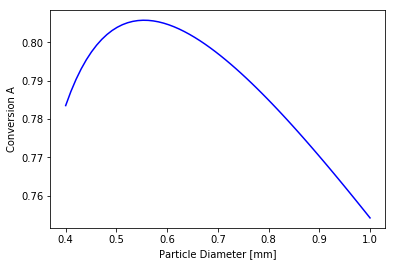

In [24]:
plt.figure(1)
plt.plot(dpspan*1000, Conversion, color='blue', label='XA')
plt.ylabel('Conversion A') 
plt.xlabel('Particle Diameter [mm]') 
plt.show()

In [25]:
Xmax = max(Conversion)
Xmax

0.8057659735927656

In [26]:
#values check:
Xmin = min(Conversion)
Xmin

0.7541749925464789

$75.4~\%$ is the same as answer for Q3 so code should be correct.

In [27]:
#Values check2:
Q4 = interp(0.0005, dpspan, Conversion)
Q4

0.8037938675000731

$80.4\%$ is the same answer as for Q4. I am now confident that the answer for Q5 is correct.

**Maximum conversion = $80.6\%$**

In [28]:
i = argmax(Conversion==max(Conversion))
dp_opt = dpspan[i]
print('Optimum dp= '+str(dp_opt*1000)+'mm')

Optimum dp= 0.552542372881356mm


**Q5 answer: $0.553~mm$**

----------------------------------------------------------------------

**6. What is the conversion of the reactant at the given optimum particle diameter? Give as $\%$ and round to $3$ significant numbers i.e. $12.3\%$.** [3 points]

*This was calculated already in Q5*

**Q6 answer: $80.6\%$**

**7. Explain in a short paragraph why this optimum exists.** [4 points]

When changing the particle diameter of the catalyst, all else being equal, there are two things acting opposite to each other, viz-a-viz, the total available area of the catalyst for the reaction to take place, and the effectiveness factor for the rate of reaction.

The effectivenes factor, $\eta$, is inversely proportional to the catalyst particle diameter, $d_{p}$, in first order reactions. In other words, the small the diameter of the catalyst particle, the better the effectiveness factor, the greater the conversion.

But, the smaller the diameter of the catalyst particle, the less the total available catalyst area for the reaction to take place therefore the lower the conversion (which is illustration in the rendered diagram for Q5). So, there must be an optimum catalyst particle diameter where the conversion is at it's maximum.